In [1]:
import pandas as pd
import numpy as np

In [2]:
# extract data from csv file

df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [3]:
# check the all columns

df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

Obesity = Overweight and obesity are defined as abnormal or excessive fat accumulation that presents a risk to health

Sedentary Hours Per Day = Sedentary hours per day refers to the amount of time spent sitting or lying down during the day. A sedentary lifestyle is defined as spending more than six hours per day in a seated or lying down position.

BMI = stands for Body Mass Index, which is a measurement of body weight relative to height

Triglycerides = Triglycerides are a type of fat (lipid) found in your blood. The triglycerides are stored in your fat cells.



In [4]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
# NaN values in a specific column

df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
# handling missing values 
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(8763, 26)

In [9]:
data = df.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere',"Family History","Income"])

In [10]:
data["Sedentary Hours Per Day"]

0        6.615001
1        4.963459
2        9.463426
3        7.648981
4        1.514821
          ...    
8758    10.806373
8759     3.833038
8760     2.375214
8761     0.029104
8762     9.005234
Name: Sedentary Hours Per Day, Length: 8763, dtype: float64

In [11]:
data["BMI"]

0       31.251233
1       27.194973
2       28.176571
3       36.464704
4       21.809144
          ...    
8758    19.655895
8759    23.993866
8760    35.406146
8761    27.294020
8762    32.914151
Name: BMI, Length: 8763, dtype: float64

In [12]:
df["Exercise Hours Per Week"]

0        4.168189
1        1.813242
2        2.078353
3        9.828130
4        5.804299
          ...    
8758     7.917342
8759    16.558426
8760     3.148438
8761     3.789950
8762    18.081748
Name: Exercise Hours Per Week, Length: 8763, dtype: float64

In [13]:
## segregate numerical and categorical column
Numerical_columns = data.columns[data.dtypes != "object"]
Categorical_columns = data.columns[data.dtypes == "object"]
print("Numerical_column",Numerical_columns)
print("Categorical_columns",Categorical_columns)

Numerical_column Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')
Categorical_columns Index(['Sex', 'Blood Pressure', 'Diet'], dtype='object')


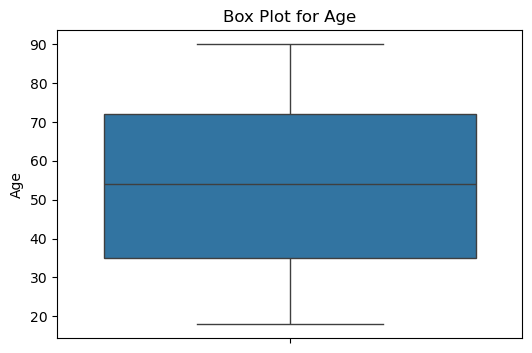

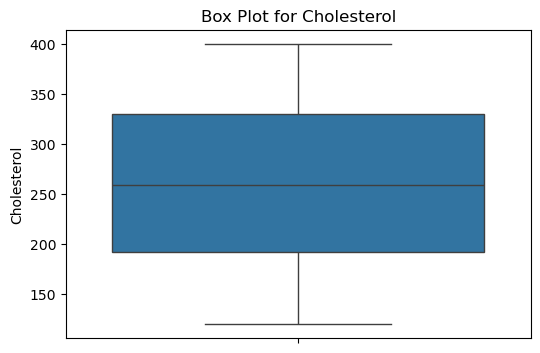

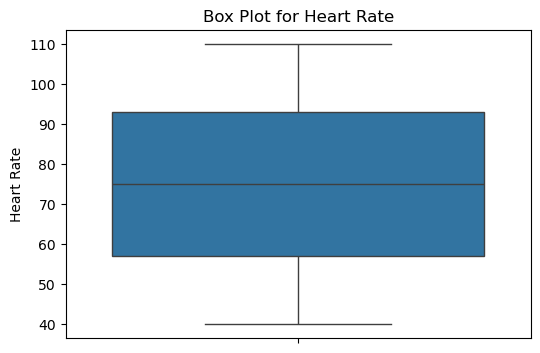

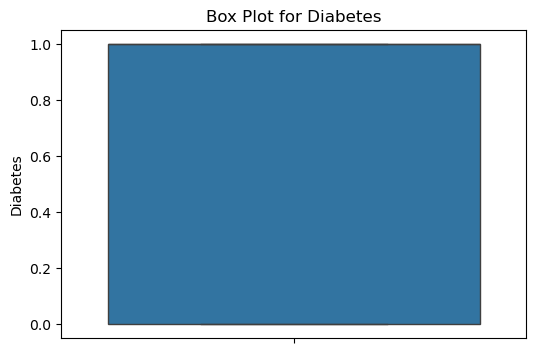

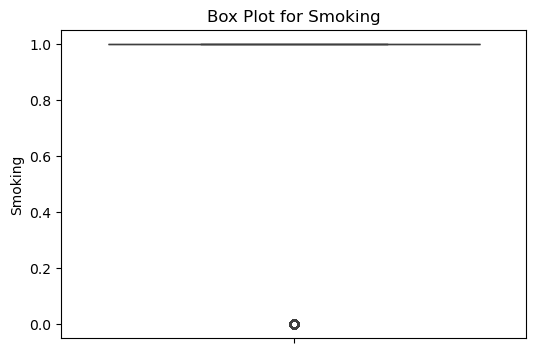

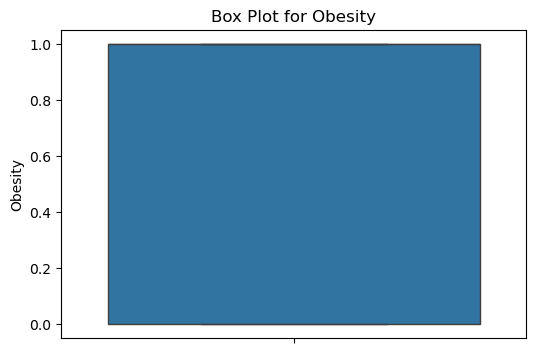

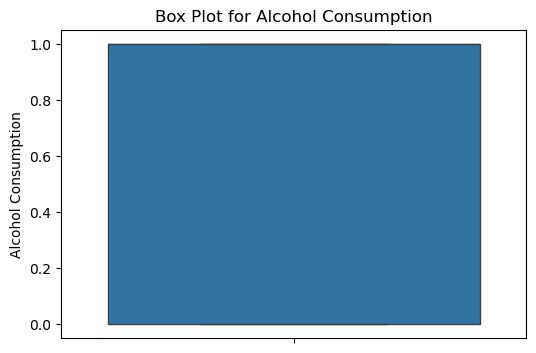

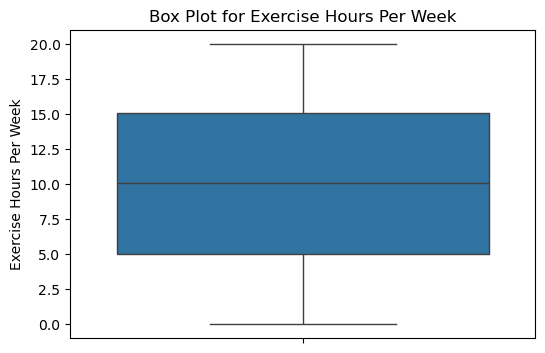

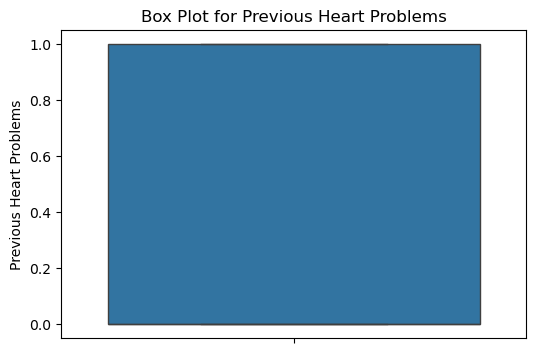

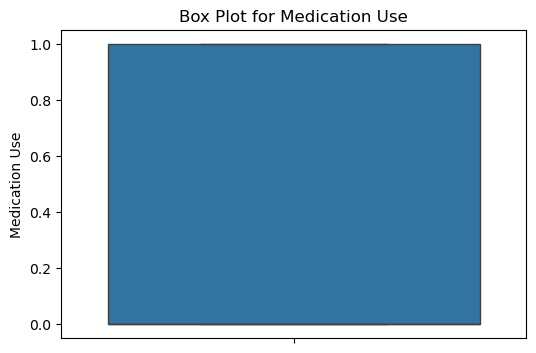

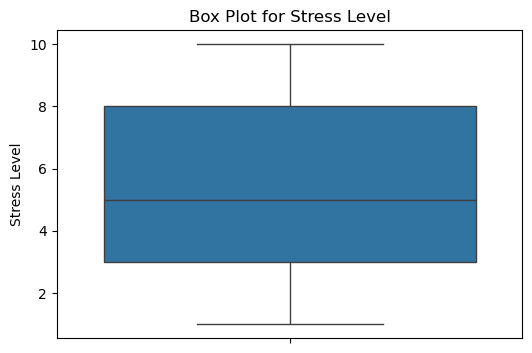

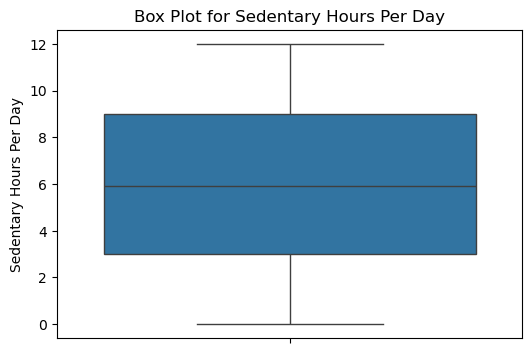

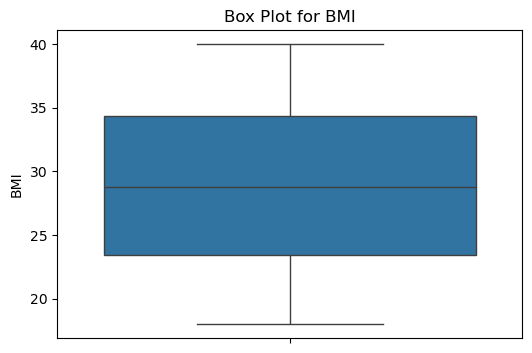

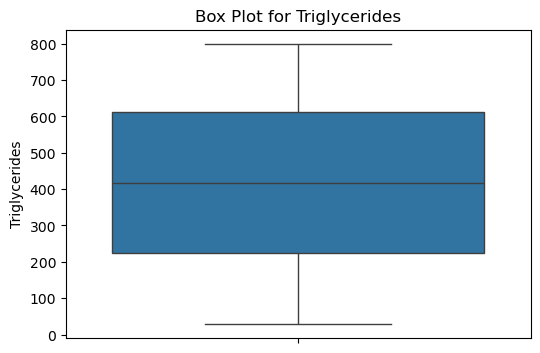

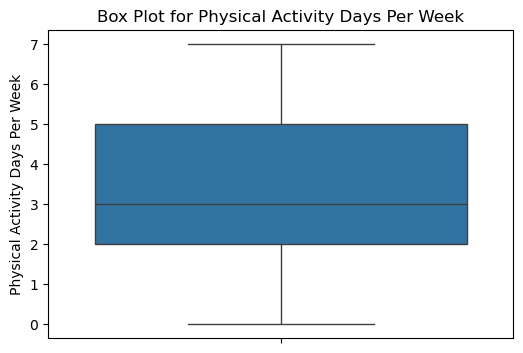

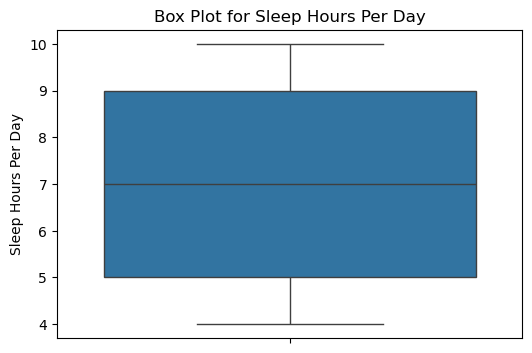

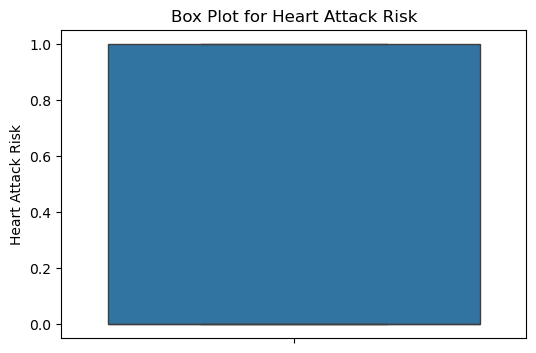

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in Numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

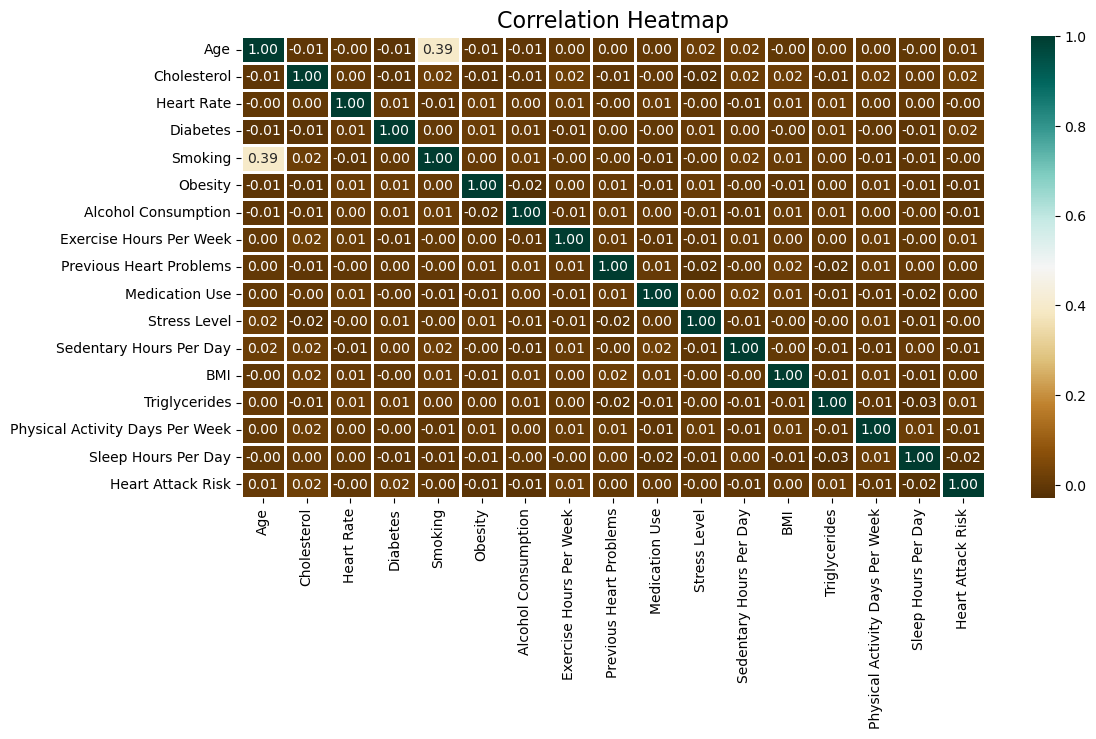

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(
    data[Numerical_columns].corr(),
    cmap='BrBG',        # Use the BrBG colormap
    fmt='.2f',          # Format for annotations
    linewidths=2,       # Line width between cells
    annot=True          # Annotate each cell with its value
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [16]:
data["Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
data["Diet"].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [18]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

label_encoders = {}
for column in ['Sex', 'Diet']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [19]:
data["Sex"].unique()

array([1, 0])

In [20]:
data["Diet"].unique()

array([0, 2, 1])

In [21]:
data["Blood Pressure"].unique()

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

### Systolic blood pressure
The higher number, which measures the pressure in your arteries when you heart contracts and pumps blooats

### Diastolic blood pressure
The lower number, which measures the pressure in your arteries when your heart relaxes between beats

For example, a blood pressure reading of 120/80 means a systolic pressure of 120 and a diastolic pressure of 80.

In [22]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)


In [23]:
data = data.drop(columns=['Blood Pressure'])

In [24]:
data.head()

Age  Sex  Cholesterol  Heart Rate  Diabetes  Smoking  Obesity  \
0   67    1          208          72         0        1        0   
1   21    1          389          98         1        1        1   
2   21    0          324          72         1        0        0   
3   84    1          383          73         1        1        0   
4   66    1          318          93         1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Diet  ...  Medication Use  \
0                    0                 4.168189     0  ...               0   
1                    1                 1.813242     2  ...               0   
2                    0                 2.078353     1  ...               1   
3                    1                 9.828130     0  ...               0   
4                    0                 5.804299     2  ...               0   

   Stress Level  Sedentary Hours Per Day        BMI  Triglycerides  \
0             9                 6.615001  31.251233            286   
1             1                 4.963459  27.194973            235   
2             9                 9.463426  28.176571            587   
3             9                 7.648981  36.464704            378   
4             6                 1.514821  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  \
0                                0                    6                  0   
1                                1                    7                  0   
2                                4                    4                  0   
3                                3                    4                  0   
4                                1                    5                  0   

   Systolic_BP  Diastolic_BP  
0        158.0          88.0  
1        165.0          93.0  
2        174.0          99.0  
3        163.0         100.0  
4         91.0          88.0  

[5 rows x 21 columns]

In [25]:
data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Smoking',
       'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int32  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int32  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

In [27]:
data["Exercise Hours Per Week"] = data["Exercise Hours Per Week"].astype(int)

In [28]:
data["Sedentary Hours Per Day"] = data["Sedentary Hours Per Day"].astype(int)

In [29]:
data["BMI"] = data["BMI"].astype(int)
data["Systolic_BP"] = data["Systolic_BP"].astype(int)
data["Diastolic_BP"] = data["Diastolic_BP"].astype(int)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              8763 non-null   int64
 1   Sex                              8763 non-null   int32
 2   Cholesterol                      8763 non-null   int64
 3   Heart Rate                       8763 non-null   int64
 4   Diabetes                         8763 non-null   int64
 5   Smoking                          8763 non-null   int64
 6   Obesity                          8763 non-null   int64
 7   Alcohol Consumption              8763 non-null   int64
 8   Exercise Hours Per Week          8763 non-null   int32
 9   Diet                             8763 non-null   int32
 10  Previous Heart Problems          8763 non-null   int64
 11  Medication Use                   8763 non-null   int64
 12  Stress Level                     8763 non-null  

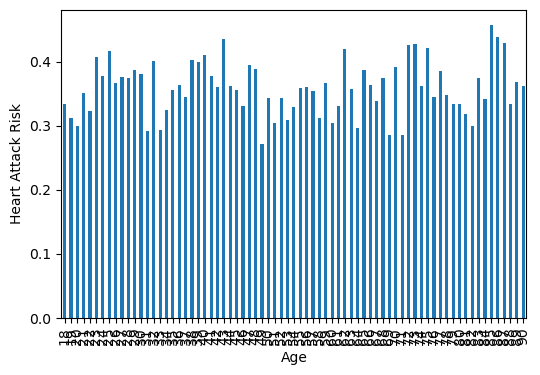

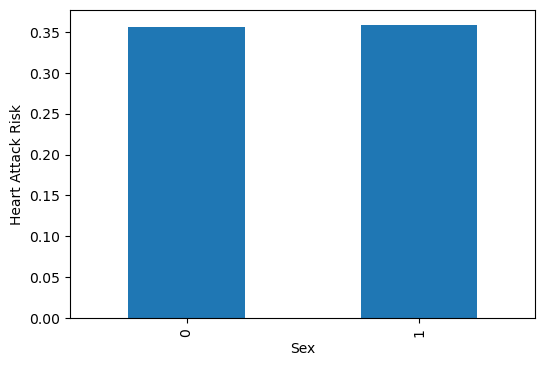

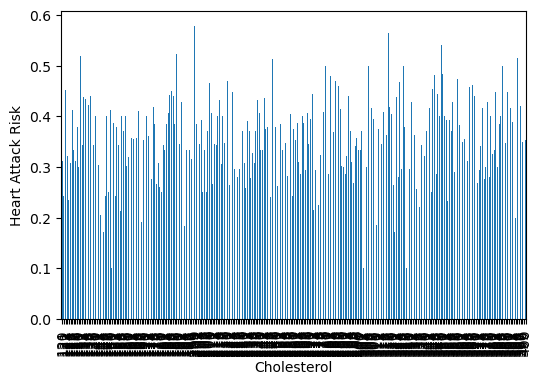

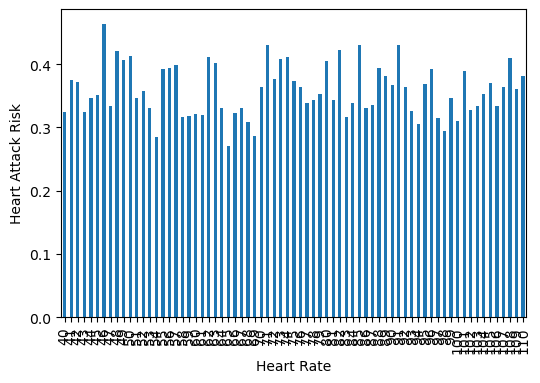

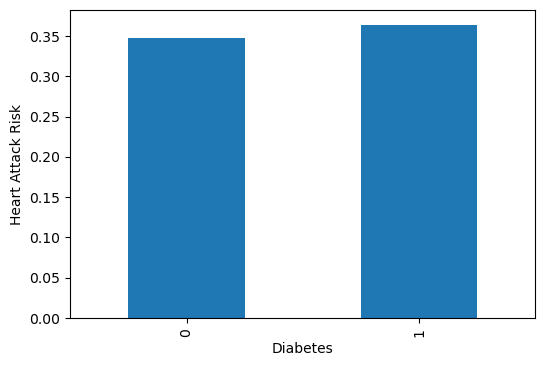

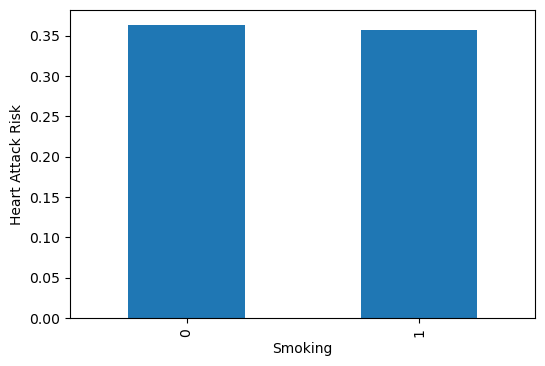

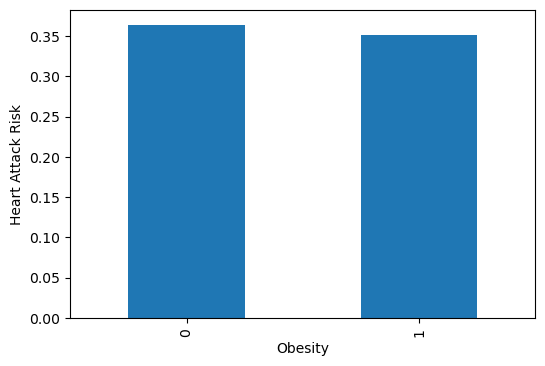

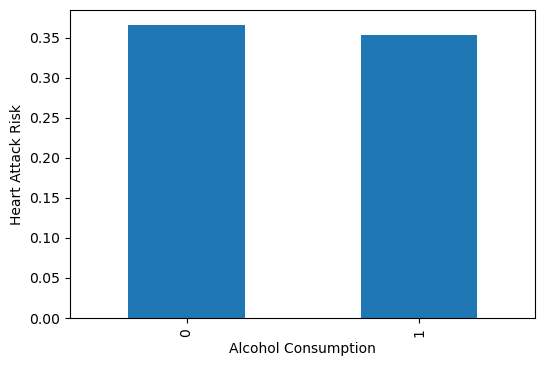

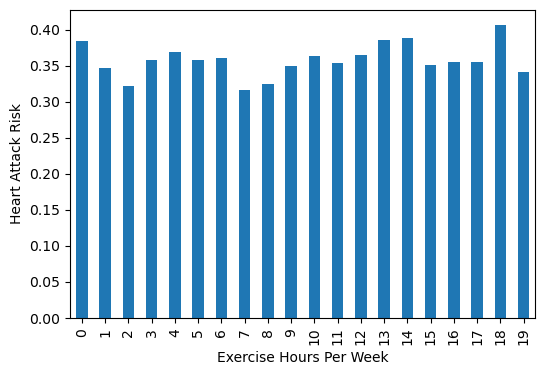

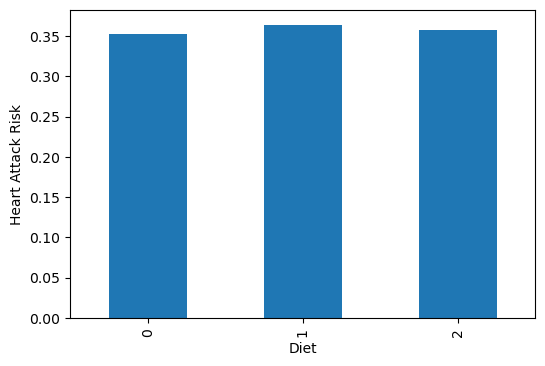

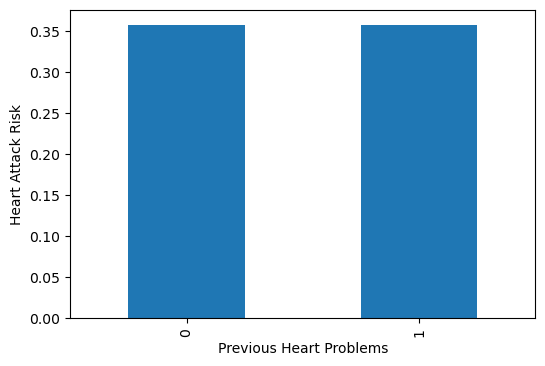

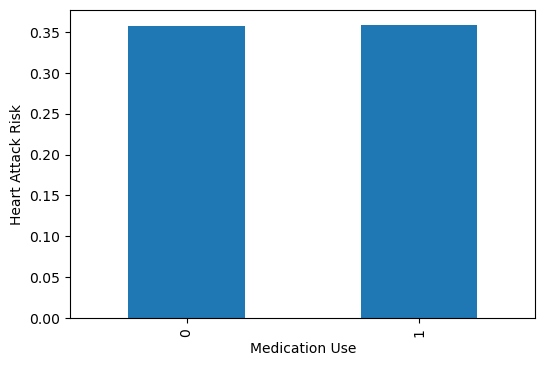

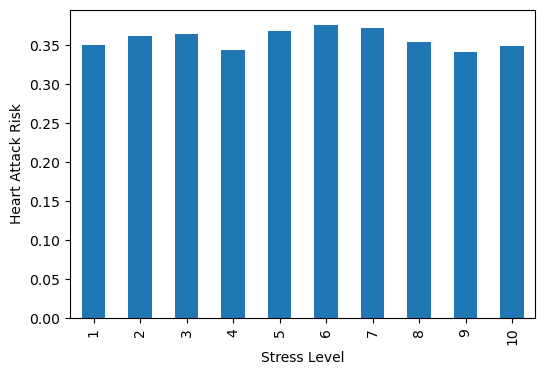

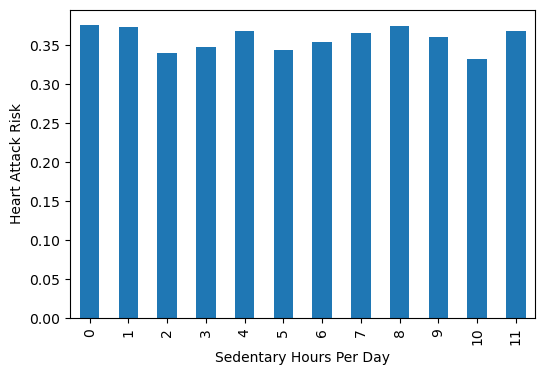

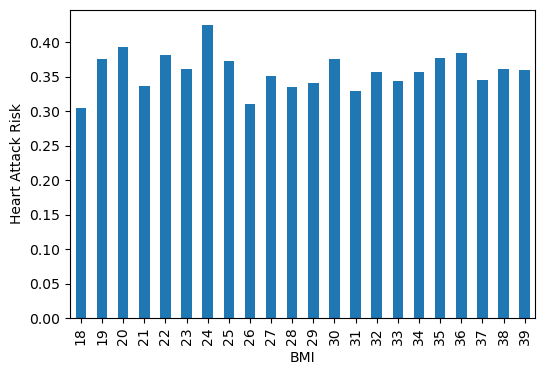

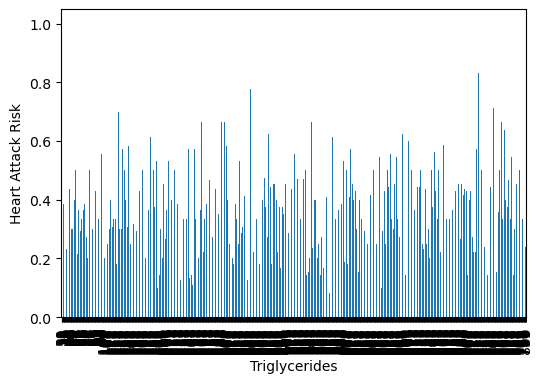

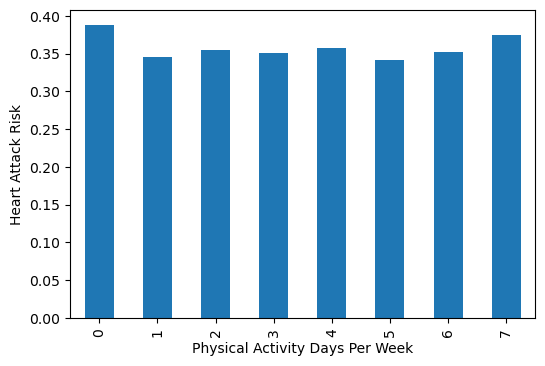

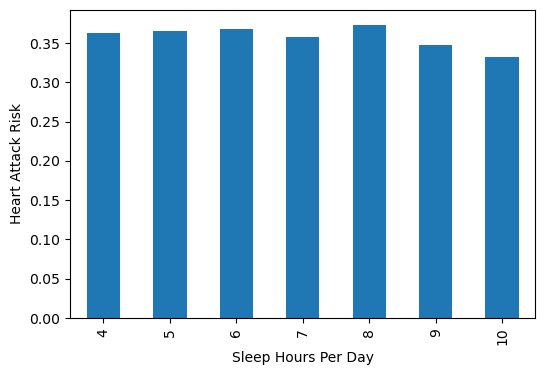

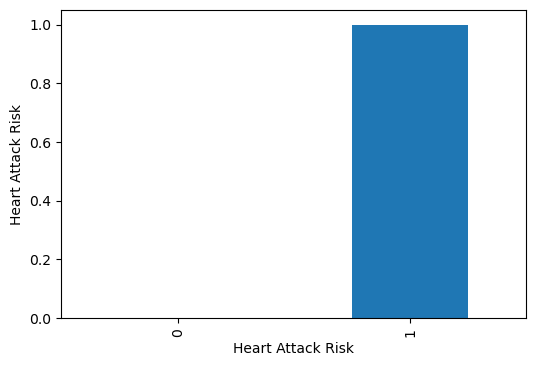

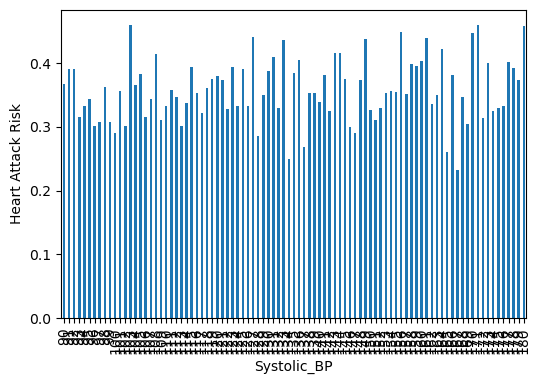

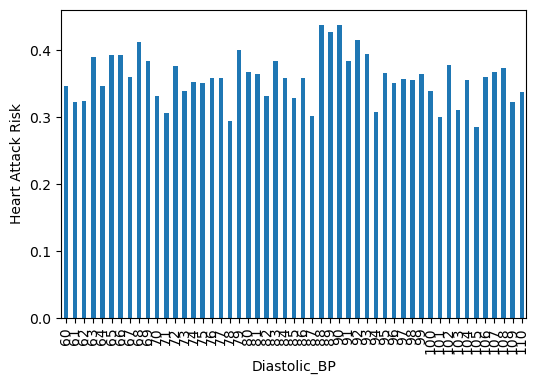

In [31]:
for i in data:
    grouped_data = data.groupby(i)['Heart Attack Risk'].mean()

    # Plot the comparison
    grouped_data.plot(kind='bar', figsize=(6, 4))
    plt.xlabel(i)
    plt.ylabel('Heart Attack Risk')
    
    plt.show()

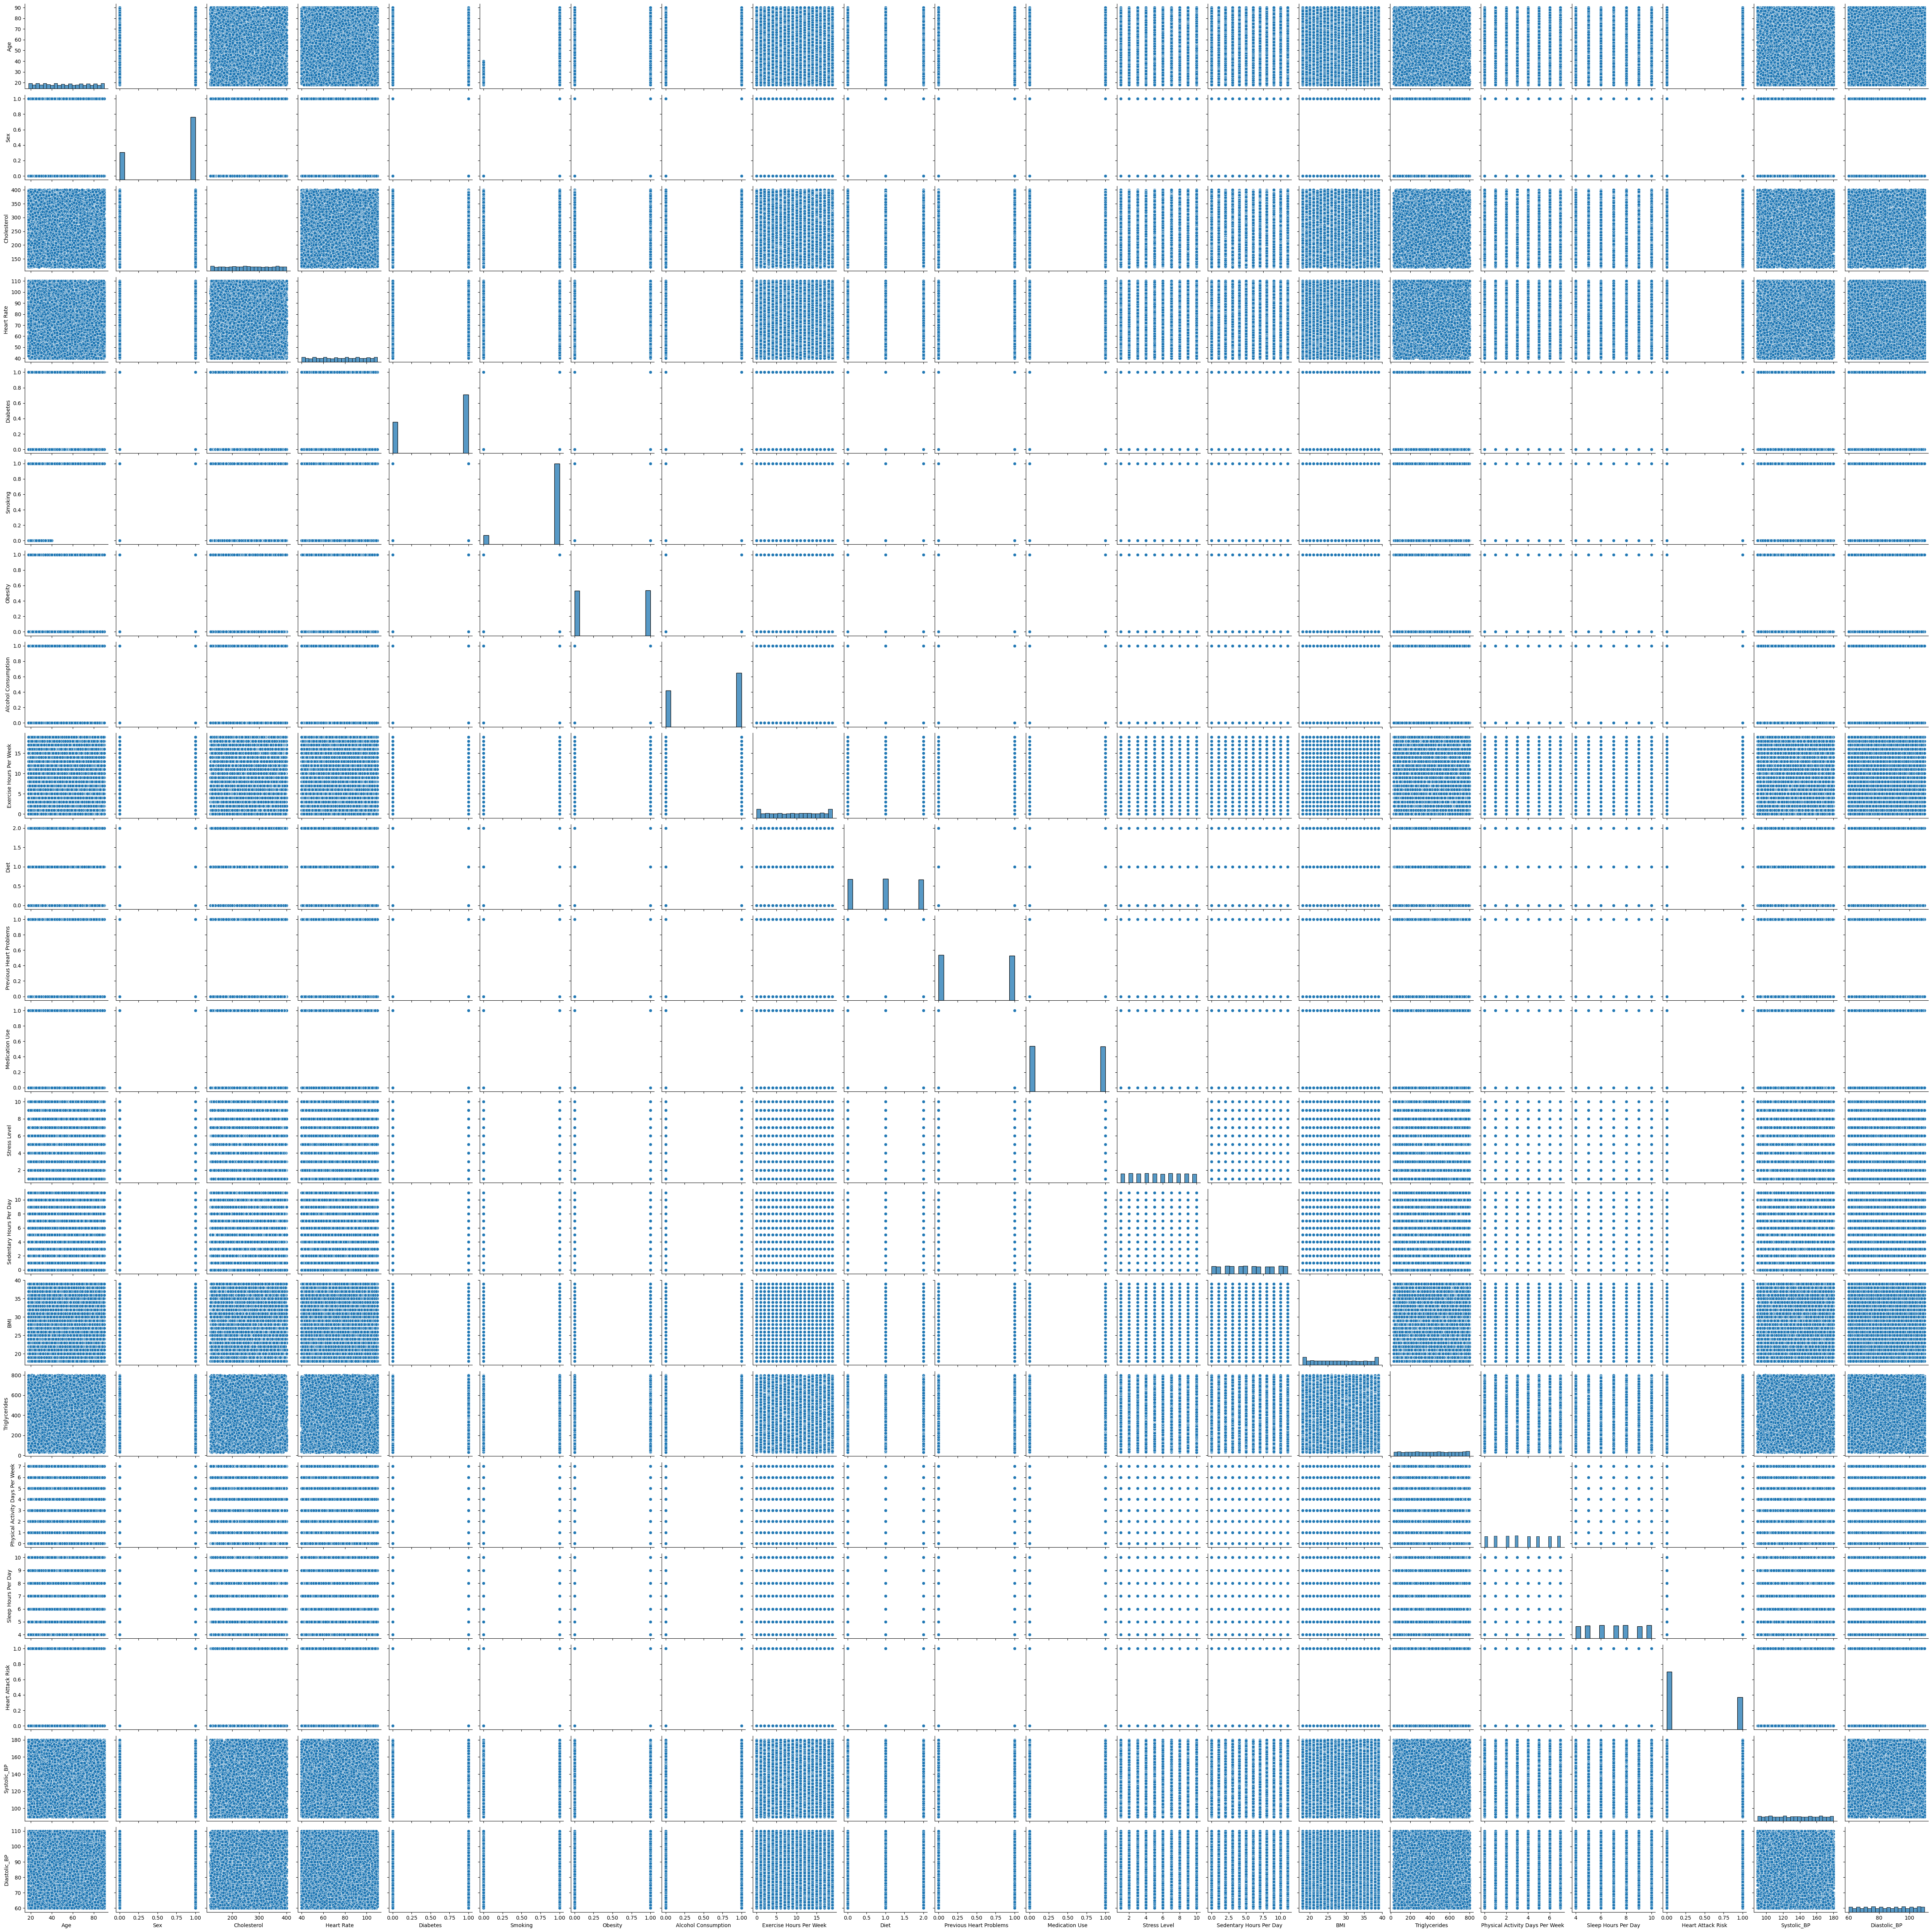

In [32]:
sns.pairplot(data)

What are triglycerides? Triglycerides are a type of fat (lipid) found in your blood.

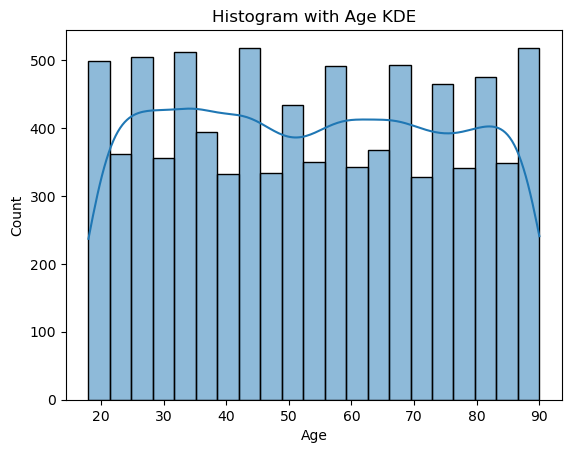

In [34]:
sns.histplot(df['Age'], kde=True)
plt.title('Histogram with Age KDE')
plt.show()

In [35]:
# Convert all columns to float
data = data.astype(float)

print(data.dtypes)

Age                                float64
Sex                                float64
Cholesterol                        float64
Heart Rate                         float64
Diabetes                           float64
Smoking                            float64
Obesity                            float64
Alcohol Consumption                float64
Exercise Hours Per Week            float64
Diet                               float64
Previous Heart Problems            float64
Medication Use                     float64
Stress Level                       float64
Sedentary Hours Per Day            float64
BMI                                float64
Triglycerides                      float64
Physical Activity Days Per Week    float64
Sleep Hours Per Day                float64
Heart Attack Risk                  float64
Systolic_BP                        float64
Diastolic_BP                       float64
dtype: object


In [36]:
X = data.drop(columns=['Heart Attack Risk'])
y = data['Heart Attack Risk']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1,test_size=0.2)

In [39]:
X_train

Age  Sex  Cholesterol  Heart Rate  Diabetes  Smoking  Obesity  \
7361  54.0  1.0        265.0        77.0       0.0      1.0      1.0   
54    31.0  1.0        243.0        92.0       1.0      1.0      1.0   
4133  27.0  1.0        153.0       106.0       0.0      1.0      1.0   
7011  74.0  1.0        319.0        82.0       0.0      1.0      0.0   
4230  76.0  1.0        149.0        42.0       1.0      1.0      0.0   
...    ...  ...          ...         ...       ...      ...      ...   
2895  29.0  0.0        399.0        94.0       0.0      0.0      0.0   
7813  70.0  1.0        280.0        88.0       0.0      1.0      1.0   
905   79.0  1.0        139.0        77.0       1.0      1.0      0.0   
5192  50.0  1.0        347.0        68.0       1.0      1.0      0.0   
235   75.0  0.0        389.0        51.0       0.0      1.0      0.0   

      Alcohol Consumption  Exercise Hours Per Week  Diet  \
7361                  1.0                      1.0   2.0   
54                    1.0                      2.0   2.0   
4133                  1.0                      5.0   0.0   
7011                  0.0                      6.0   0.0   
4230                  1.0                      7.0   1.0   
...                   ...                      ...   ...   
2895                  1.0                     19.0   0.0   
7813                  1.0                     11.0   1.0   
905                   0.0                     18.0   0.0   
5192                  1.0                      5.0   1.0   
235                   0.0                     11.0   1.0   

      Previous Heart Problems  Medication Use  Stress Level  \
7361                      0.0             1.0           4.0   
54                        0.0             1.0           2.0   
4133                      1.0             1.0           8.0   
7011                      0.0             0.0           8.0   
4230                      0.0             1.0           8.0   
...                       ...             ...           ...   
2895                      1.0             1.0           9.0   
7813                      0.0             1.0           7.0   
905                       1.0             0.0           5.0   
5192                      1.0             0.0           5.0   
235                       0.0             1.0           2.0   

      Sedentary Hours Per Day   BMI  Triglycerides  \
7361                      1.0  32.0          323.0   
54                        7.0  30.0          410.0   
4133                      5.0  37.0          446.0   
7011                     11.0  19.0          532.0   
4230                      0.0  20.0          600.0   
...                       ...   ...            ...   
2895                      4.0  27.0          367.0   
7813                      5.0  35.0          304.0   
905                       2.0  33.0          257.0   
5192                      1.0  39.0           43.0   
235                       6.0  39.0          779.0   

      Physical Activity Days Per Week  Sleep Hours Per Day  Systolic_BP  \
7361                              0.0                  8.0        165.0   
54                                7.0                  9.0        100.0   
4133                              7.0                  9.0        138.0   
7011                              7.0                 10.0        107.0   
4230                              5.0                  8.0        103.0   
...                               ...                  ...          ...   
2895                              7.0                  4.0         99.0   
7813                              3.0                  5.0        178.0   
905                               2.0                  4.0         96.0   
5192                              0.0                  4.0        166.0   
235                               1.0                  5.0        123.0   

      Diastolic_BP  
7361          67.0  
54            80.0  
4133          75.0  
7011          75.0  
4230     

In [40]:
X_test

Age  Sex  Cholesterol  Heart Rate  Diabetes  Smoking  Obesity  \
7441  57.0  1.0        218.0        58.0       1.0      1.0      0.0   
6355  19.0  0.0        280.0        70.0       0.0      0.0      0.0   
1271  89.0  0.0        300.0        98.0       1.0      1.0      1.0   
3511  70.0  1.0        258.0        97.0       0.0      1.0      0.0   
1821  41.0  1.0        352.0        84.0       0.0      1.0      1.0   
...    ...  ...          ...         ...       ...      ...      ...   
5430  67.0  1.0        216.0       103.0       0.0      1.0      0.0   
1748  48.0  1.0        289.0        81.0       1.0      1.0      1.0   
3258  86.0  1.0        183.0       101.0       0.0      1.0      0.0   
3801  28.0  0.0        232.0        89.0       0.0      0.0      0.0   
4824  20.0  1.0        373.0        47.0       1.0      1.0      1.0   

      Alcohol Consumption  Exercise Hours Per Week  Diet  \
7441                  1.0                      6.0   1.0   
6355                  1.0                      1.0   1.0   
1271                  1.0                      6.0   1.0   
3511                  1.0                      5.0   0.0   
1821                  1.0                      5.0   1.0   
...                   ...                      ...   ...   
5430                  1.0                     10.0   2.0   
1748                  0.0                     10.0   0.0   
3258                  1.0                     16.0   1.0   
3801                  0.0                     19.0   0.0   
4824                  1.0                      0.0   2.0   

      Previous Heart Problems  Medication Use  Stress Level  \
7441                      0.0             0.0           1.0   
6355                      1.0             1.0           3.0   
1271                      0.0             1.0          10.0   
3511                      0.0             0.0           6.0   
1821                      1.0             0.0           5.0   
...                       ...             ...           ...   
5430                      0.0             1.0           3.0   
1748                      0.0             1.0           3.0   
3258                      1.0             1.0           7.0   
3801                      0.0             1.0           9.0   
4824                      0.0             0.0           9.0   

      Sedentary Hours Per Day   BMI  Triglycerides  \
7441                      6.0  24.0          373.0   
6355                      2.0  36.0           50.0   
1271                      7.0  24.0          284.0   
3511                      1.0  34.0          309.0   
1821                      1.0  20.0           90.0   
...                       ...   ...            ...   
5430                      3.0  32.0          354.0   
1748                      9.0  22.0          593.0   
3258                      7.0  20.0           62.0   
3801                      6.0  26.0          387.0   
4824                      4.0  18.0          685.0   

      Physical Activity Days Per Week  Sleep Hours Per Day  Systolic_BP  \
7441                              5.0                  7.0        114.0   
6355                              6.0                  5.0        139.0   
1271                              0.0                  7.0        124.0   
3511                              6.0                 10.0        151.0   
1821                              3.0                  4.0        120.0   
...                               ...                  ...          ...   
5430                              1.0                  5.0        122.0   
1748                              3.0                  6.0        166.0   
3258                              4.0                  8.0        171.0   
3801                              1.0                  7.0         97.0   
4824                              6.0                  6.0        115.0   

      Diastolic_BP  
7441          67.0  
6355         104.0  
1271          93.0  
3511         104.0  
1821     

In [41]:
y_train

7361    1.0
54      0.0
4133    0.0
7011    0.0
4230    0.0
       ... 
2895    0.0
7813    1.0
905     0.0
5192    1.0
235     0.0
Name: Heart Attack Risk, Length: 7010, dtype: float64

In [42]:
y_test

7441    1.0
6355    0.0
1271    0.0
3511    1.0
1821    1.0
       ... 
5430    0.0
1748    1.0
3258    0.0
3801    0.0
4824    1.0
Name: Heart Attack Risk, Length: 1753, dtype: float64

In [43]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
best_k = None
best_accuracy = 0
for i in range(1,20,2):
    classifier_3 = KNeighborsClassifier(n_neighbors=i)
    model=classifier_3.fit(X_train, y_train)
    print(f"Model trained with n_neighbors={i}: {model}")
    y_pred_3 = model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred_3)
    print(accuracy*100)
    if accuracy > best_accuracy:
        print(accuracy*100)
        best_accuracy = accuracy


Model trained with n_neighbors=1: KNeighborsClassifier(n_neighbors=1)
53.05191100969766
53.05191100969766
Model trained with n_neighbors=3: KNeighborsClassifier(n_neighbors=3)
54.47803764974329
54.47803764974329
Model trained with n_neighbors=5: KNeighborsClassifier()
56.93097547062179
56.93097547062179
Model trained with n_neighbors=7: KNeighborsClassifier(n_neighbors=7)
58.58528237307473
58.58528237307473
Model trained with n_neighbors=9: KNeighborsClassifier(n_neighbors=9)
60.63890473474044
60.63890473474044
Model trained with n_neighbors=11: KNeighborsClassifier(n_neighbors=11)
61.26640045636053
61.26640045636053
Model trained with n_neighbors=13: KNeighborsClassifier(n_neighbors=13)
60.18254420992584
Model trained with n_neighbors=15: KNeighborsClassifier(n_neighbors=15)
62.57843696520251
62.57843696520251
Model trained with n_neighbors=17: KNeighborsClassifier(n_neighbors=17)
62.74957216200798
62.74957216200798
Model trained with n_neighbors=19: KNeighborsClassifier(n_neighbors=1

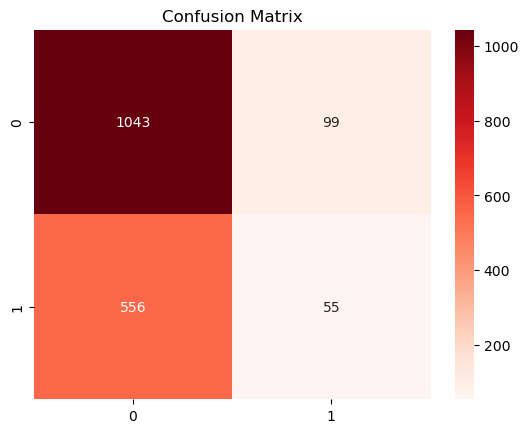

In [45]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [46]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None,5, 7, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini','entropy']
}

dtree = DecisionTreeClassifier()

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

best_params = grid_search.best_params_
clf = DecisionTreeClassifier(**best_params)

clf_model = clf.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt*100)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}
64.06160867084996


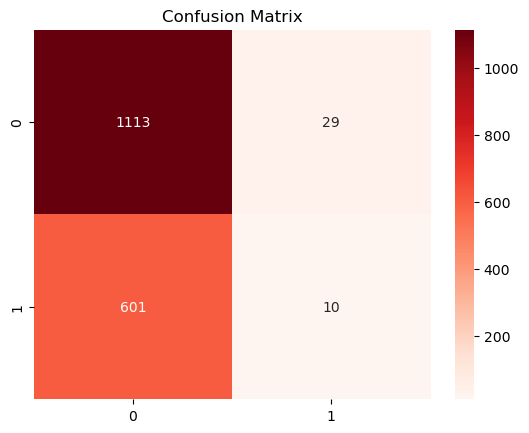

In [47]:
cm_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'n_estimators': [10, 50, 100],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'criterion': ['gini', 'entropy']       # Splitting criteria
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate on test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Set Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Test Set Accuracy: 65.20%

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79      1142
           1       1.00      0.00      0.00       611

    accuracy                           0.65      1753
   macro avg       0.83      0.50      0.40      1753
weighted avg       0.77      0.65      0.52      1753



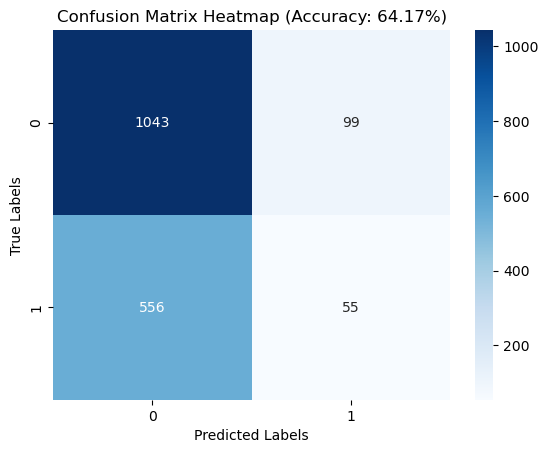

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix Heatmap (Accuracy: {accuracy_best * 100:.2f}%)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [49]:
model = XGBClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
score=accuracy_score(y_test,ypred)
print(score*100)

59.66913861950941


In [50]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax',eval_metric='mlogloss', random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [3, 5, 7],          # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size
    'subsample': [0.6, 0.8, 1.0]     # Fraction of samples per tree
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on test set
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nOptimized Test Set Accuracy: {:.2f}%".format(accuracy_best * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


NameError: name 'xgb' is not defined

In [54]:
import xgboost as xgb

# Ensure target values are properly encoded as integers if necessary
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost Classifier with multi-class support
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y)),  # Automatically set number of classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nOptimized Test Set Accuracy: {:.2f}%".format(accuracy_best * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


C:\Users\SHREE\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:24:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SHREE\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:24:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SHREE\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:24:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Optimized Test Set Accuracy: 64.17%


NameError: name 'classification_report' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.show()